## Getting final row of each epoch

I.e., the winning bids of each epoch

# Data analysis of Auction Model

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global variable (which was used in the batch runs)
AUCTION_LENGTH = 100

In [4]:
# 10,000 epochs of simulations
legacy_df = pd.read_csv("../data/same_sniper_early_bid increase.csv", index_col=0)

## Getting final row of each epoch

I.e., the winning bids of each epoch

In [6]:
splits = np.where(legacy_df["Highest Bid"] == 0)[0]
splits = np.delete(splits, 0)
splits = np.append(splits, len(legacy_df["Highest Bid"]-1))
final_rows = splits - 1
print(final_rows)

[    100     201     302 ... 1009797 1009898 1009999]


In [7]:
final_prices_df = legacy_df.iloc[final_rows]
# Removing any rows which contain 0 or None
# These are edge cases where the model does not receive any bids in the first few timesteps
final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)

C:\Users\giova\AppData\Local\Temp/ipykernel_12640/1367672686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_prices_df.drop(final_prices_df.index[np.where(final_prices_df["Highest Bid"] == 0)[0]], axis=0, inplace=True)


### Plotting histogram of winning bids

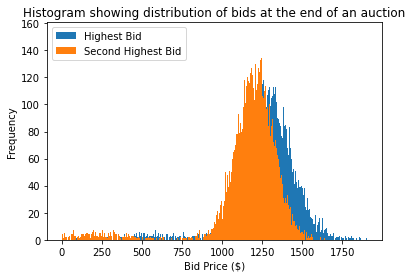

In [8]:
final_prices_df.plot.hist(bins=500)
plt.title("Histogram showing distribution of bids at the end of an auction")
plt.xlabel("Bid Price ($)")
plt.show()

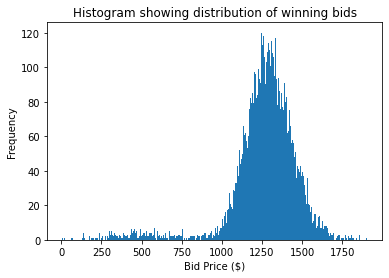

In [9]:
final_prices_df["Highest Bid"].plot.hist(bins=500)
plt.title("Histogram showing distribution of winning bids")
plt.xlabel("Bid Price ($)")
plt.show()

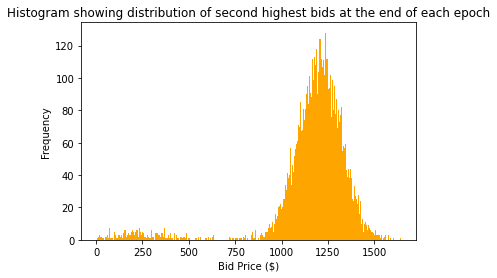

In [10]:
final_prices_df["Second Highest Bid"].plot.hist(bins=500, color="orange")
plt.title("Histogram showing distribution of second highest bids at the end of each epoch")
plt.xlabel("Bid Price ($)")
plt.show()

From these histograms, it is evident that the distribution the bidders' internal valuation and maxbids are drawn from plays a huge role in determining the nature of the auction model.

However, one notices that there is a large negative skew to the distribution, which indicates that bidProba and watchProba play an important role in the auction process.

## Calculating win ratio of EarlyBidder : SniperBidder

In [11]:
earlyBidderWinPercent = 100 * (len(np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]) / len(final_prices_df["Highest Bidder"]))
sniperBidderWinPercent = 100 - earlyBidderWinPercent

In [12]:
print(f'EarlyBidder win percentage: {earlyBidderWinPercent:.2f}%')
print(f'SniperBidder win percentage: {sniperBidderWinPercent:.2f}%')

EarlyBidder win percentage: 39.40%
SniperBidder win percentage: 60.60%


## Finding sniper bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [13]:
sniper_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "SniperBidder")[0]]

In [14]:
sniper_bidder_curse = (sniper_bidder_wins["Highest Bid"] - sniper_bidder_wins["Second Highest Bid"]) / sniper_bidder_wins["Second Highest Bid"]
print(sniper_bidder_curse)

302        0.051225
403        0.164026
504        0.269022
605        0.032652
706        0.008089
             ...   
1009494    0.196534
1009595    0.119304
1009797    0.284833
1009898    0.235157
1009999    0.184801
Length: 6060, dtype: float64


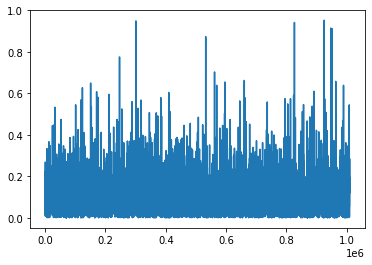

In [15]:
sniper_bidder_curse.plot()
plt.show()

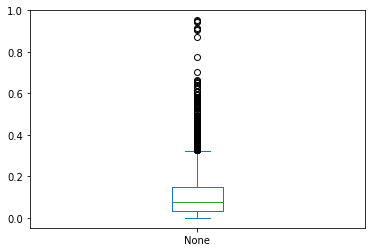

In [16]:
sniper_bidder_curse.plot.box()
plt.show()

In [17]:
mean_sniper_curse = np.mean(sniper_bidder_curse)
print(f'Mean sniper bidder premium: {mean_sniper_curse}')
median_sniper_curse = np.median(sniper_bidder_curse)
print(f'Median sniper bidder premium: {median_sniper_curse}')

Mean sniper bidder premium: 0.10522051729430572
Median sniper bidder premium: 0.07738547492889569


## Finding early bidder wins

Plus calculating the percentage difference between the 1st and 2nd highest bids

In [18]:
early_bidder_wins = final_prices_df.iloc[np.where(final_prices_df["Highest Bidder"] == "EarlyBidder")[0]]

In [19]:
early_bidder_curse = (early_bidder_wins["Highest Bid"] - early_bidder_wins["Second Highest Bid"]) / early_bidder_wins["Second Highest Bid"]
print(early_bidder_curse)

100        4.423630
201        0.050163
1009       0.035744
1514       0.138356
1615       0.087316
             ...   
1008484    0.066731
1008585    0.054342
1008888    0.034753
1009393    0.097569
1009696    0.037365
Length: 3940, dtype: float64


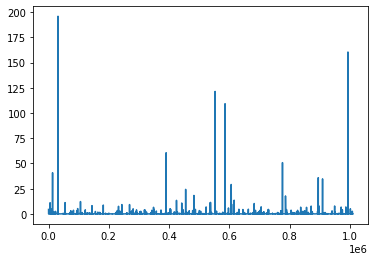

In [20]:
early_bidder_curse.plot()
plt.show()

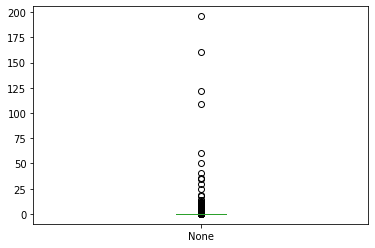

In [21]:
early_bidder_curse.plot.box()
plt.show()

In [22]:
mean_early_bidder_curse = np.mean(early_bidder_curse)
print(f'Mean early bidder premium: {mean_early_bidder_curse}')
median_early_bidder_curse = np.median(early_bidder_curse)
print(f'Median early bidder premium: {median_early_bidder_curse}')

Mean early bidder premium: 0.4301975998881758
Median early bidder premium: 0.036422247937822956


We can see that the early bidders paid a large premium (43%) for their win on average (mean), however the median value is much lower at 4%, showing that there was some serious outliers in the dataset

In [23]:
print(early_bidder_wins.iloc[np.argmax(early_bidder_curse)])

Highest Bid               949.661628
Highest Bidder           EarlyBidder
Second Highest Bid          4.822249
Second Highest Bidder    EarlyBidder
Name: 31511, dtype: object


## Finding mean auction bid (highest and second highest) at each timestep

In [24]:
mean_bids = legacy_df.groupby(np.arange(len(legacy_df))%(AUCTION_LENGTH+1)).mean()
print(f'Mean winning bid: {mean_bids["Highest Bid"][len(mean_bids)-1]}')

Mean winning bid: 1266.4004046300188


In [25]:
mean_sniper_bidder_win = sniper_bidder_wins["Highest Bid"].mean()
mean_early_bidder_win = early_bidder_wins["Highest Bid"].mean()

print(f'Mean winning bid (SniperBidder): {mean_sniper_bidder_win}')
print(f'Mean winning bid (EarlyBidder): {mean_early_bidder_win}')

Mean winning bid (SniperBidder): 1324.518097823301
Mean winning bid (EarlyBidder): 1177.0112623073562


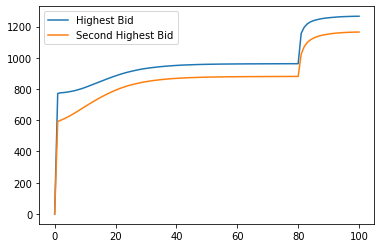

In [26]:
mean_bids.plot()
plt.show()